# Investigation of the reliability of borrowers

The customer is the credit department of the bank. It is necessary to understand whether the marital status and the number of children of the client affect the fact of repayment of the loan on time. Input data from the bank — statistics on the solvency of customers.

The results of the study will be taken into account when building a model of **credit scoring** — a special system that evaluates the ability of a potential borrower to repay a loan to the bank.

## Step 1. Learning general information

In [1]:
#import pandas library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Import the Mystem class from the pymystem3 module 
#(a tool for lemmatizing Russian words that uses 
#the "Mystem" morphology and syntax analysis system developed by Yandex)
from pymystem3 import Mystem

In [2]:
#create an object m of class Mystem (will be used to lemmatize words later)
m = Mystem()

#load data from "data.csv" file into df variable
df = pd.read_csv('/datasets/data.csv')

#write data from the df variable to a new file "data_preprocessing.csv"
df.to_csv('data_preprocessing.csv', index=False) 

display(df.head(15)) #we print the first 15 lines

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
#output the names of the columns in order to check their correct spelling
df.columns 

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [4]:
#output information about data types
df.dtypes 

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

In [5]:
#output information about the lines
df.shape 

(21525, 12)

In [6]:
#output summary information
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [7]:
#summary statistical information about numeric columns 
#for quick data analysis and getting a general idea of the distribution of values in columns.
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


**Conclusion**

1. In the column **days_employed** - negative values. This is probably a human factor. Since the indicator contains values about the total length of service that affects the accounting of the borrower's solvency, it is advisable to replace them with positive ones, as well as lead to an integer format. NaN gaps have also been identified, the short ones will need to be replaced.

2. In the column **education** - the values are indicated by different spelling, which is duplicates and incorrectly affects data processing - it is necessary to process them and bring them to a single spelling. Such mistakes are not accidental.

3. In **total_income** there are missing values in the form of NAN, it is necessary to replace it with an arithmetic mean, since the data will be useful in calculations, and also lead to the format "two decimal places".

4. In the column **purpose** similar goals are indicated in different words, these are duplicates, lemmanization is necessary.

5. Lines in columns days_employed and total_income - they differ, so there are missing values.

The general information of the dataframe and its cross section of columns allowed us to determine and distribute the following types of variables:

**high - quality** - education,  education_id, family_status, family_status_id, gender, income_type, purpose

**quantitative** - children, days_employed, dob_years, total_income 

**logical** - debt 

**Data preprocessing is necessary** to fill in the gaps, identify and delete duplicates, bring the values to the correct display, as well as to group and categorize in order to conduct a survey.

## Step 2. Data preprocessing

### Processing of omissions

In [8]:
#identify and count the gaps
df.isna().sum() 

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [9]:
#displaying gaps in the dataframe columns
df[df['days_employed'].isna()] 

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


**Conclusion**
As it was determined when studying the general information, there are missing values with the same number in the days_employed and total_income columns, and NAN were also detected.
days_employed and total_income are the quantitative values required in calculations for subsequent data analysis. Apparently, this information was not transmitted.
It is necessary to fill in the missing values, as well as identify duplicates and delete them.

In [10]:
#identifying unique values by column children
df['children'].unique() 

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [11]:
#replace using the abs() method, simultaneously overwriting the variable
df['children'] = df['children'].abs() 
#df['children'] = df['children'].replace(-1, 1) #the second method

#print it out
print(df['children'].unique()) 

[ 1  0  3  2  4 20  5]


In [12]:
#look for the median value in the children column not including 20 and save it to a variable
children_median = df['children'].median() 

#replace 20 with the median value
df['children'] = df['children'].replace(20, children_median)

#we check that the replacement has occurred
print(df['children'].unique())

[1. 0. 3. 2. 4. 5.]


**Conclusion**
When searching for unique values, the digit "-1" was detected. this value for the number of children is incorrect. This is probably a typo. 
It was replaced by a positive number by the abs() method.
It is likely that the family has 20 children (there may be different reasons, for example adoption or a religious family), but clearly, this is a mistake. It is better to clarify these data in the future, but for now, it has been decided to replace 20 with the median value.

In [13]:
#identifying unique values by column education
education_unique = df['education'].unique() 

#print it out and counting unique values with printing output
print(education_unique) 
print()
print('Уникальных значений education:', len(education_unique))

['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']

Уникальных значений education: 15


In [14]:
#replacing the spelling of the values of the education column in lowercase
df['education'] = df['education'].str.lower() 

#overwriting the variable by searching for unique values
education_unique_str = df['education'].unique() 

#counting unique values with printing output
len(education_unique_str)

5

**Conclusion** 
When searching for unique values, the spelling of values with different registers was revealed. These are duplicates. It can be seen that they were entered manually. Because of this, the number of values is greater than it should actually be. 
After converting to a string value and counting, we see that the unique values have decreased from 15 to 5.

In [15]:
#replacing the spelling of the values of the family_status column in lowercase
df['family_status'] = df['family_status'].str.lower()

#by searching for unique values, we display on the screen
print(df['family_status'].unique()) 

['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'не женат / не замужем']


**Conclusion** 
When searching for unique values, the spelling of values with different registers was revealed. Or is it a human factor, or an accidental error (maybe it was already "hammered in")
After being translated into a string value and counting, we see a single format of writing - in a string

In [16]:
#identifying unique values by column gender
df['gender'].unique() 

array(['F', 'M', 'XNA'], dtype=object)

In [17]:
#looking for what 'XNA' is in the column gender
df[df['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0.0,-2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


**Conclusion** 
The revealed value of 'XNA' in the gender column is apparently random, since only one row with this value has been determined. We can only assume that this is a woman.
Despite the fact that it is more typical for a man not to graduate from higher education and at the same time not to have children at the age of 24, the analysis of the cross-section by gender, education, age (up to 30 years) and goals showed that there are 4 more women according to these criteria.

In [18]:
#First, let's put together a list where the rows with the floor M correspond to the values True, and the rest— False.
print(df['gender'] == 'F')

0         True
1         True
2        False
3        False
4         True
         ...  
21520     True
21521     True
21522    False
21523    False
21524     True
Name: gender, Length: 21525, dtype: bool


In [19]:
#identifying unique values by column income_type
df['income_type'].unique() 

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

In [20]:
#identifying unique values by column purpose
df['purpose'].unique() 

#overwriting the variable
purpose_unique = df['purpose'].unique()

#print it out
print(purpose_unique)

#counting unique values with printing output
print('unique values purpose:', len(purpose_unique))

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']
unique values purpose: 38


**Conclusion** 
When searching for unique values, the same goals were identified, but with different spellings. Because of this, the number of values is greater than it should actually be. It is necessary to bring it to a single format through lemmatization.

In [21]:
#way 1
#1.creating a grouping for the total_income column with average values, then to combine with the main table
total_income_group_mean = df.groupby('income_type')['total_income'].mean()

#checking the grouping
total_income_group_mean

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        170898.309923
компаньон          202417.461462
пенсионер          137127.465690
предприниматель    499163.144947
сотрудник          161380.260488
студент             98201.625314
Name: total_income, dtype: float64

In [22]:
#2.creating an income_mean dataframe with average revenue values added to the pivot table
df_income_mean = pd.DataFrame({'df_income_mean':total_income_group_mean}).reset_index()

#display it on the screen in a table
df_income_mean 

,income_type,df_income_mean
0,безработный,131339.751676
1,в декрете,53829.130729
2,госслужащий,170898.309923
3,компаньон,202417.461462
4,пенсионер,137127.465690
5,предприниматель,499163.144947
6,сотрудник,161380.260488
7,студент,98201.625314


In [23]:
#3.attaching df_income_mean to the main table

#adding a created dataframe to the main dataframe
df = df.merge(df_income_mean, on='income_type', how='right')

#filling in gaps with an average value
df['total_income'] = df['total_income'].fillna(df['df_income_mean'])

print(df['total_income'].isna().sum())
display(df)

0


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,df_income_mean
0,1.0,337524.466835,31,среднее,1,женат / замужем,0,M,безработный,1,59956.991984,покупка жилья для сдачи,131339.751676
1,0.0,395302.838654,45,высшее,0,гражданский брак,1,F,безработный,0,202722.511368,ремонт жилью,131339.751676
2,2.0,-3296.759962,39,среднее,1,женат / замужем,0,F,в декрете,1,53829.130729,автомобиль,53829.130729
3,0.0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,170898.309923,образование,170898.309923
4,0.0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,170898.309923,сделка с подержанным автомобилем,170898.309923
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1.0,-2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости,161380.260488
21521,1.0,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость,161380.260488
21522,3.0,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля,161380.260488
21523,2.0,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля,161380.260488


In [24]:
#way2
df['total_income'] = df['total_income'].fillna(df.groupby('income_type')['total_income'].transform(lambda x : x.median()))
display(df.head(5))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,df_income_mean
0,1.0,337524.466835,31,среднее,1,женат / замужем,0,M,безработный,1,59956.991984,покупка жилья для сдачи,131339.751676
1,0.0,395302.838654,45,высшее,0,гражданский брак,1,F,безработный,0,202722.511368,ремонт жилью,131339.751676
2,2.0,-3296.759962,39,среднее,1,женат / замужем,0,F,в декрете,1,53829.130729,автомобиль,53829.130729
3,0.0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,170898.309923,образование,170898.309923
4,0.0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,170898.309923,сделка с подержанным автомобилем,170898.309923


**Conclusion** 
Omissions in the column total_income have been replaced. Replacement by way 2 works only if the omissions are distributed randomly, i.e. the probability of a skip in a row does not depend on other values in the row.

In [25]:
#get the distribution of frequencies (or shares) of unique values in the total_income column
df['total_income'].value_counts(normalize=True)

161380.260488    0.051336
202417.461462    0.023600
137127.465690    0.019187
170898.309923    0.006829
499163.144947    0.000093
                   ...   
257483.510211    0.000046
149590.391882    0.000046
102401.422569    0.000046
170287.046664    0.000046
189255.286637    0.000046
Name: total_income, Length: 19355, dtype: float64

In [26]:
df.groupby('income_type')['total_income'].apply(lambda x : x.isna().mean())

income_type
безработный        0.0
в декрете          0.0
госслужащий        0.0
компаньон          0.0
пенсионер          0.0
предприниматель    0.0
сотрудник          0.0
студент            0.0
Name: total_income, dtype: float64

In [27]:
#1.1.creating a grouping for the days_employed column with average values to then combine with the main table
days_employed_mean = df.groupby('income_type')['days_employed'].mean()

#checking the grouping
print(days_employed_mean) 

income_type
безработный        366413.652744
в декрете           -3296.759962
госслужащий         -3399.896902
компаньон           -2111.524398
пенсионер          365003.491245
предприниматель      -520.848083
сотрудник           -2326.499216
студент              -578.751554
Name: days_employed, dtype: float64


In [28]:
#2.1. creating a dataframe days_employed_mean with average income values with addition to the summary table
df_days_employed_mean = pd.DataFrame({'df_days_employed_mean':days_employed_mean}).reset_index()

#display it on the screen in a beautiful table
df_days_employed_mean 

,income_type,df_days_employed_mean
0,безработный,366413.652744
1,в декрете,-3296.759962
2,госслужащий,-3399.896902
3,компаньон,-2111.524398
4,пенсионер,365003.491245
5,предприниматель,-520.848083
6,сотрудник,-2326.499216
7,студент,-578.751554


In [29]:
#3.1.attaching df_days_employed_mean to the main table

#adding a created dataframe to the main dataframe
df = df.merge(df_days_employed_mean, on='income_type', how='left')

#filling in gaps with an average value
df['days_employed'] = df['days_employed'].fillna(df['df_days_employed_mean'])

print(df['days_employed'].isna().sum())
display(df)

0


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,df_income_mean,df_days_employed_mean
0,1.0,337524.466835,31,среднее,1,женат / замужем,0,M,безработный,1,59956.991984,покупка жилья для сдачи,131339.751676,366413.652744
1,0.0,395302.838654,45,высшее,0,гражданский брак,1,F,безработный,0,202722.511368,ремонт жилью,131339.751676,366413.652744
2,2.0,-3296.759962,39,среднее,1,женат / замужем,0,F,в декрете,1,53829.130729,автомобиль,53829.130729,-3296.759962
3,0.0,-3399.896902,41,среднее,1,женат / замужем,0,M,госслужащий,0,170898.309923,образование,170898.309923,-3399.896902
4,0.0,-3399.896902,50,среднее,1,женат / замужем,0,F,госслужащий,0,170898.309923,сделка с подержанным автомобилем,170898.309923,-3399.896902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1.0,-2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости,161380.260488,-2326.499216
21521,1.0,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость,161380.260488,-2326.499216
21522,3.0,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля,161380.260488,-2326.499216
21523,2.0,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля,161380.260488,-2326.499216


**Conclusion** 
Omissions have been replaced with average values in the days_employed column

In [30]:
#estimate the amount of data in the data frame
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21525 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   children               21525 non-null  float64
 1   days_employed          21525 non-null  float64
 2   dob_years              21525 non-null  int64  
 3   education              21525 non-null  object 
 4   education_id           21525 non-null  int64  
 5   family_status          21525 non-null  object 
 6   family_status_id       21525 non-null  int64  
 7   gender                 21525 non-null  object 
 8   income_type            21525 non-null  object 
 9   debt                   21525 non-null  int64  
 10  total_income           21525 non-null  float64
 11  purpose                21525 non-null  object 
 12  df_income_mean         21525 non-null  float64
 13  df_days_employed_mean  21525 non-null  float64
dtypes: float64(5), int64(4), object(5)
memory usage: 2.5+ 

**Conclusion** 
The rows in all columns are the same

**OUTPUT BY SECTION** 
- in the days_employed and total_income columns, the missing values were replaced as follows:
1. it was necessary to find the arithmetic mean.
2. a dataframe was created separately to record the found average values.
3. the merge method added the created dataframe.
3. the fillna method replaced the gaps with the found average values in the main dataframe.

- the negative value in the children column has been replaced by the abs() method

- replaced the spelling of the values of the education and family_status columns in lowercase

### Replacing the data type

In [31]:
#assign an integer value to the days_employed column due to the atypical nature of decimal places
df['days_employed'] = df['days_employed'].astype('int')

#assign an integer value to the total_income column due to the atypical nature of decimal places
df['total_income'] = df['total_income'].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21525 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   children               21525 non-null  float64
 1   days_employed          21525 non-null  int64  
 2   dob_years              21525 non-null  int64  
 3   education              21525 non-null  object 
 4   education_id           21525 non-null  int64  
 5   family_status          21525 non-null  object 
 6   family_status_id       21525 non-null  int64  
 7   gender                 21525 non-null  object 
 8   income_type            21525 non-null  object 
 9   debt                   21525 non-null  int64  
 10  total_income           21525 non-null  int64  
 11  purpose                21525 non-null  object 
 12  df_income_mean         21525 non-null  float64
 13  df_days_employed_mean  21525 non-null  float64
dtypes: float64(3), int64(6), object(5)
memory usage: 2.5+ 

**Conclusion**
replaced the value of the days_employed and total_income columns with an integer type (from float to int) using the method.astype() for ease of perception.
This method is easy to use if you need to convert "pure" data (i.e. homogeneous) having numeric characters. You can also change both several columns and the entire dataframe. If the message is a dataframe, then .astype() passes the desired data type as an argument without a dictionary.


### Processing duplicates

In [32]:
#identify the amount of duplicates in the dataframe
print('Duplicates in the table:', df.duplicated().sum())

Duplicates in the table: 71


In [33]:
#remove the identified duplicates
df = df.drop_duplicates().reset_index(drop=True)

#checking for duplicates in the dataframe

df.info()
print('Duplicates in the table:', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   children               21454 non-null  float64
 1   days_employed          21454 non-null  int64  
 2   dob_years              21454 non-null  int64  
 3   education              21454 non-null  object 
 4   education_id           21454 non-null  int64  
 5   family_status          21454 non-null  object 
 6   family_status_id       21454 non-null  int64  
 7   gender                 21454 non-null  object 
 8   income_type            21454 non-null  object 
 9   debt                   21454 non-null  int64  
 10  total_income           21454 non-null  int64  
 11  purpose                21454 non-null  object 
 12  df_income_mean         21454 non-null  float64
 13  df_days_employed_mean  21454 non-null  float64
dtypes: float64(3), int64(6), object(5)
memory usage: 2.3+ 

**Conclusion**

Duplicates were found using the method .duplicates() followed by their summation .sum()

Removed by the method .drop_duplicates() simultaneously with the use of .reset_index, since their indexes are deleted along with the removal of duplicates. Therefore, the indexes of the dataframe must be "reset"

### Lemmatization

In [34]:
#creating a variable to lemmatize the unique values of the purpose column
unique_purpose = df['purpose'].unique() 

#output to the screen
print(unique_purpose)

#creating a variable where we will save all the values from the unique_purpose list
purpose_all = [] 

#creating a variable for gluing the string
lemmas_purpose_list = ' '.join(unique_purpose) 

#creating a variable for lemmatization
lemmas = m.lemmatize(lemmas_purpose_list) 

#output to the screen lemmas_purpose_list in which everything is glued together in one line
display(lemmas_purpose_list) 

#Lemmatize each line in 'purpose_all', get a list of lemmas and add values to the empty list of 'lemmas'
#pass a filter for a separate record of each unique value
for index in unique_purpose: 
    lemmas = m.lemmatize(index) #lemmatize queries 
purpose_all.append(lemmas) #adding from each line

#break it down into categories (real estate, car, wedding, repair, education, etc.) for this you need a function
def purpose_category(purpose):#writing a function
    purpose_all_row = m.lemmatize(purpose) #string variables - lemmatize
    for index in purpose_all_row: #pass the filter
        if 'жил' in index:#prescribe the conditions, if there is one,
            return 'недвижимость' #then we return the correct value
        if 'недвиж' in index:
            return 'недвижимость / жилье'
        if 'авто' in index:
            return 'автомобиль'
        if 'свадьб' in index:
            return 'свадьба'
        if 'ремонт' in index:
            return 'ремонт'
        if 'образов' in index:
            return 'образование'
    else:
        'не является целью получения кредита'

#calling a special container Counter from the collections module
from collections import Counter 

#save the result of the calculation in a variable df_lemmas_purpose
df_lemmas_purpose = Counter(lemmas).most_common(31) 

#creating a new table using the DatdFrame method with the 'count' column. 
#The descending order is already set automatically
df_df_lemmas_purpose = pd.DataFrame(df_lemmas_purpose, columns = ['item', 'count'])  

#output to the screen df_df_lemmas_purpose
display(df_df_lemmas_purpose) 

#overwriting with the function apply
df['purpose_category'] = df['purpose'].apply(purpose_category)
print(df['purpose_category'].head(15))

['покупка жилья для сдачи' 'ремонт жилью' 'автомобиль' 'образование'
 'сделка с подержанным автомобилем' 'на проведение свадьбы'
 'получение высшего образования' 'покупка коммерческой недвижимости'
 'операции с коммерческой недвижимостью' 'операции со своей недвижимостью'
 'покупка жилья' 'покупка своего жилья' 'операции с недвижимостью'
 'приобретение автомобиля' 'дополнительное образование'
 'покупка жилья для семьи' 'покупка недвижимости' 'жилье'
 'профильное образование' 'заняться высшим образованием'
 'сделка с автомобилем' 'на покупку автомобиля' 'операции с жильем'
 'недвижимость' 'заняться образованием' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'получение образования'
 'строительство жилой недвижимости' 'на покупку своего автомобиля'
 'свадьба' 'на покупку подержанного автомобиля'
 'строительство недвижимости' 'автомобили'
 'получение дополнительного образования' 'сыграть свадьбу'
 'свой автомобиль' 'высшее образование']


'покупка жилья для сдачи ремонт жилью автомобиль образование сделка с подержанным автомобилем на проведение свадьбы получение высшего образования покупка коммерческой недвижимости операции с коммерческой недвижимостью операции со своей недвижимостью покупка жилья покупка своего жилья операции с недвижимостью приобретение автомобиля дополнительное образование покупка жилья для семьи покупка недвижимости жилье профильное образование заняться высшим образованием сделка с автомобилем на покупку автомобиля операции с жильем недвижимость заняться образованием покупка жилой недвижимости строительство собственной недвижимости получение образования строительство жилой недвижимости на покупку своего автомобиля свадьба на покупку подержанного автомобиля строительство недвижимости автомобили получение дополнительного образования сыграть свадьбу свой автомобиль высшее образование'

,item,count
0,высокий,1
1,,1
2,образование,1
3,\n,1


0             недвижимость
1                   ремонт
2               автомобиль
3              образование
4               автомобиль
5                  свадьба
6              образование
7     недвижимость / жилье
8     недвижимость / жилье
9     недвижимость / жилье
10            недвижимость
11             образование
12    недвижимость / жилье
13            недвижимость
14    недвижимость / жилье
Name: purpose_category, dtype: object


**Conclusion**
By breaking the goals into lemmas for each row in the column, we were able to allow the program to find keywords and sort them into groups, according to the conditions that we prescribed, the values were grouped into the expected number of 4-6 values,

**OUTPUT BY SECTION** 

By means of a filter, the lemmas of words are distributed into groups.
The group "is not the purpose of obtaining a loan" - includes everything that does not fit the key "query-words" - which means it will not be taken into account.

In [35]:
#check if the string value contains the substring 'not'
df[df['purpose_category'].str.contains('не')].head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,df_income_mean,df_days_employed_mean,purpose_category
0,1.0,337524,31,среднее,1,женат / замужем,0,M,безработный,1,59956,покупка жилья для сдачи,131339.751676,366413.652744,недвижимость
7,1.0,-2802,28,высшее,0,женат / замужем,0,M,госслужащий,0,207561,покупка коммерческой недвижимости,170898.309923,-3399.896902,недвижимость / жилье
8,1.0,-3399,32,высшее,0,женат / замужем,0,M,госслужащий,0,170898,операции с коммерческой недвижимостью,170898.309923,-3399.896902,недвижимость / жилье


In [36]:
#get unique values ​​in purpose_category column
df['purpose_category'].value_counts()

недвижимость / жилье    5121
недвижимость            5083
автомобиль              4306
образование             4013
свадьба                 2324
ремонт                   607
Name: purpose_category, dtype: int64

### Categorization of data

In [37]:
"""distribute the data into the following categories:
- children
- marital status
- income
- purpose of the loan
- loan repayment
"""

#creating a category "for children"
print(df['children'])#counting children by number in the column in descending order

#prescribing the function
def category_children(row):
    if row == 0:
        return 'no children'
    elif row < 3:
        return 'small family'
    else:
        return 'large family'

df['category_children'] = df['children'].apply(category_children)#
df['category_children'].value_counts()

0        1.0
1        0.0
2        2.0
3        0.0
4        0.0
        ... 
21449    1.0
21450    1.0
21451    3.0
21452    2.0
21453    0.0
Name: children, Length: 21454, dtype: float64


no children     14167
small family     6907
large family      380
Name: category_children, dtype: int64

In [38]:
#creating a category "by children - "yes-no"

#counting children by the number in the column in descending order
print(df['children'].value_counts())

#prescribing the function
def category_children_yes(row):
    if row == 0:
        return 'no children'
    elif row < 20:
        return 'have children'

df['category_children_yes'] = df['children'].apply(category_children_yes)#
df['category_children_yes'].value_counts()

0.0    14167
1.0     4855
2.0     2052
3.0      330
4.0       41
5.0        9
Name: children, dtype: int64


no children      14167
have children     7287
Name: category_children_yes, dtype: int64

In [39]:
#creating a category "by status"

#counting statuses by number in the column in descending order
print(df['family_status'].value_counts())

#prescribing the function
def family_status_count(row):
    if row == 'женат / замужем':
        return 'в браке'
    elif row != 'женат / замужем':
        return 'вне брака'

df['family_status_count'] = df['family_status'].apply(family_status_count)#
df['family_status_count'].value_counts()

женат / замужем          12339
гражданский брак          4151
не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64


в браке      12339
вне брака     9115
Name: family_status_count, dtype: int64

In [40]:
#creating a category "by income"
df['total_income'].median()
#round the median value and equate it to 1 median = 150,000
#we will make subgroups: 1 - up to 100,000, 2 - up to 150,000, 3 - up to 300,000, 4 - over 300,000

#counting the statuses in the column in descending order
print(df['total_income'].sort_values())

#prescribing the function
def category_total_income(row):
    if row <= 100000:
        return '1 income up to 100 000'
    elif row <= 150000:
        return '2 income from 100000 up to 150000'
    elif row <= 300000:
        return '3 income from 150000 up to 300000'
    else:
        return '4 income above 300000'

df['category_total_income'] = df['total_income'].apply(category_total_income)#
df['category_total_income'].value_counts()

9162       20667
8855       21205
18681      21367
6811       21695
9092       21895
          ...   
5526     1711309
21082    1715018
15087    1726276
6078     2200852
4380     2265604
Name: total_income, Length: 21454, dtype: int64


3 income from 150000 up to 300000    9418
2 income from 100000 up to 150000    6090
1 income up to 100 000               4463
4 income above 300000                1483
Name: category_total_income, dtype: int64

In [41]:
#count the debt by the number in the column in descending order
print(df['debt'].value_counts())

#prescribing the function
def debt_count(row):
    if row == 0:
        return 'no debt'
    elif row == 1:
        return 'debt'

df['debt_count'] = df['debt'].apply(debt_count)#
df['debt_count'].value_counts()

0    19713
1     1741
Name: debt, dtype: int64


no debt    19713
debt        1741
Name: debt_count, dtype: int64

**Conclusion**

According to the categorization principle, it was necessary to identify groups of different data and distribute them according to the specified criteria. So, defined:

1. The distribution of data by category "children" is made depending on the presence of children and the probability of repayment of the loan. 
So, the category_children grouping was formed by three groups of families, where:
- there are no children
- small family (up to 3 children)
- large family (over 3 children)

At the same time, another grouping category_children_yes was formed, depending on the fact of having children. Namely:
- there are children
- no children
Clients without children make up most of the total.

2. The family_status_count grouping has also been formed - by family status, depending on whether there is a marriage or not, since the official status of the borrower is legally taken into account when calculating the financial burden on each family member.


3. The distribution of data by the "income" category is grouped into the category_total_income grouping by 4 categories: 1 - up to 100 000, 2 - up to 150 000, 3 - up to 300 000, 4 - above 300 000

5. The debt_count grouping has also been formed, depending on whether there is a debt or not.
0 - no debt
1 -debt

## Step 3. Answer the questions

- Is there a relationship between having children and repayment of the loan on time?

In [42]:
#creating a pivot table by grouping category_children
df_svod = df.pivot_table(index=['category_children'], columns='debt', values='total_income', aggfunc='count')

#adding the % non-return indicator
df_svod['ratio'] = df_svod[1] / (df_svod[0] + df_svod[1]) 

#output to the screen
display(df_svod.style.format({'ratio' : '{:.2%}'.format}))

debt,0,1,ratio
category_children,,,
large family,349,31,8.16%
no children,13096,1071,7.56%
small family,6268,639,9.25%


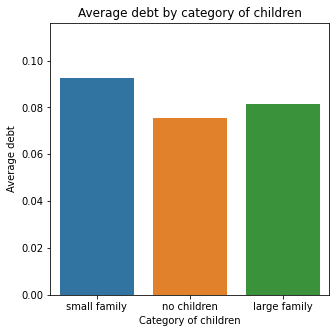

In [43]:
#building a diagram
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=df['category_children'], y=df['debt'], errwidth=0, ax=ax)
plt.title('Average debt by category of children')
plt.xlabel('Category of children')
plt.ylabel('Average debt')
plt.show()

In [44]:
#creating a pivot table by grouping category_children
df_svod = df.pivot_table(index=['category_children_yes'], columns='debt', values='total_income', aggfunc='count')

#adding the % non-return indicator
df_svod['ratio'] = df_svod[1] / (df_svod[0] + df_svod[1]) 

#output to the screen
display(df_svod.style.format({'ratio' : '{:.2%}'.format})) 

debt,0,1,ratio
category_children_yes,,,
have children,6617,670,9.19%
no children,13096,1071,7.56%


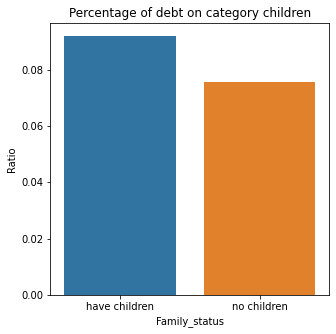

In [45]:
#building a diagram
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(y=df_svod['ratio'], x=df_svod.index, errwidth=0, ax=ax)
plt.title('Percentage of debt on category children')
plt.xlabel('Family_status')
plt.ylabel('Ratio')
plt.show()

**Conclusion**

The dependence of the presence of children and the risk of debt is determined.
The "no children" group has the smallest share of debt occurrence.

The "small family" group (with children up to 3 people), in contrast to the "large family" group (with children over 3 people), has the largest share of loan arrears. However, this is probably due to the fact that this group exceeds the "large family" group by about 18 times, and the number of non-refunds has also increased. it is possible that with a similar number, a "large family" would have higher debt risks.

- Is there a relationship between marital status and repayment of the loan on time?

In [46]:
#creating a pivot table by grouping category family_status_
df_svod = df.pivot_table(index=['family_status_count'], columns='debt', values='total_income', aggfunc='count')

#adding the % non-return indicator
df_svod['ratio'] = df_svod[1] / (df_svod[0] + df_svod[1]) 

#output to the screen
display(df_svod.style.format({'ratio' : '{:.2%}'.format})) 

debt,0,1,ratio
family_status_count,,,
в браке,11408,931,7.55%
вне брака,8305,810,8.89%


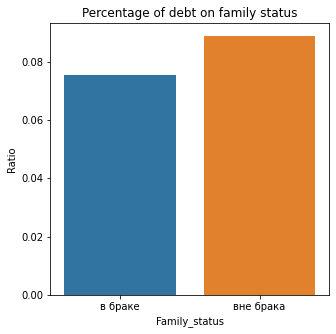

In [47]:
#building a diagram
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(y=df_svod['ratio'], x=df_svod.index, errwidth=0, ax=ax)
plt.title('Percentage of debt on family status')
plt.xlabel('Family_status')
plt.ylabel('Ratio')
plt.show()

**Conclusion**

People in marriage tend to be more responsible. Apparently, therefore, the ratio of non-repayment of loans on time is lower for them than for clients outside of marriage.

- Is there a relationship between the level of income and repayment of the loan on time?

In [48]:
#creating a pivot table by grouping category_total_income
df_svod = df.pivot_table(index=['category_total_income'], columns='debt', values='total_income', aggfunc='count')

#adding the % non-return indicator
df_svod['ratio'] = df_svod[1] / (df_svod[0] + df_svod[1]) 

#sorting by ratio
df_svod_sorted = df_svod.sort_values(by='ratio', ascending=False)

#output to the screen
display(df_svod_sorted.style.format({'ratio' : '{:.2%}'.format})) 

debt,0,1,ratio
category_total_income,,,
2 income from 100000 up to 150000,5564,526,8.64%
3 income from 150000 up to 300000,8663,755,8.02%
1 income up to 100 000,4109,354,7.93%
4 income above 300000,1377,106,7.15%


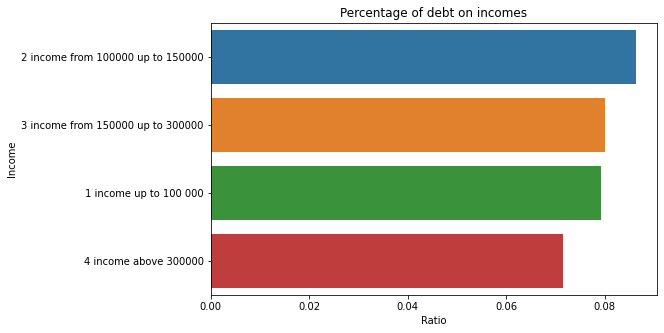

In [49]:
#building a diagram
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=df_svod_sorted['ratio'], y=df_svod_sorted.index, errwidth=0, ax=ax)
plt.title('Percentage of debt on incomes')
plt.xlabel('Ratio')
plt.ylabel('Income')
plt.show()

**Conclusion**

There is a relationship between the income level and the repayment of the loan on time, but it is not significant. 
Moreover, the groups with both the lowest and the highest income do not repay loans on time.

- How do different loan goals affect its repayment on time?

In [50]:
#creating a pivot table by grouping purpose_category
df_svod = df.pivot_table(index=['purpose_category'], columns='debt', values='total_income', aggfunc='count')

#adding the % non-return indicator
df_svod['ratio'] = df_svod[1] / (df_svod[0] + df_svod[1]) 

#sorting by ratio
df_svod_sorted = df_svod.sort_values(by='ratio', ascending=False)

#output to the screen
display(df_svod_sorted.style.format({'ratio' : '{:.2%}'.format})) 

debt,0,1,ratio
purpose_category,,,
автомобиль,3903,403,9.36%
образование,3643,370,9.22%
свадьба,2138,186,8.00%
недвижимость / жилье,4736,385,7.52%
недвижимость,4721,362,7.12%
ремонт,572,35,5.77%


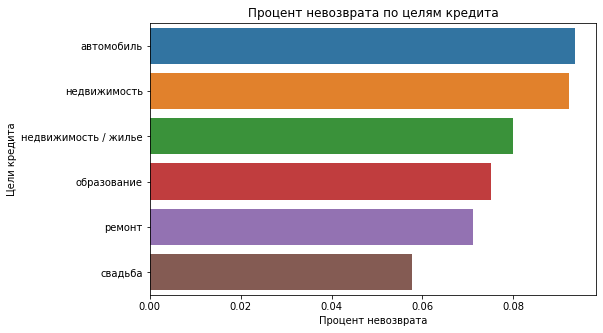

In [51]:
#building a diagram
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=df_svod_sorted['ratio'], y=df_svod.index, errwidth=0, ax=ax)
plt.title('Процент невозврата по целям кредита')
plt.xlabel('Процент невозврата')
plt.ylabel('Цели кредита')
plt.show()

There is a clear relationship between the objectives of the loan.
So, the smallest debt is traced by the category of repair, and the largest is a car

## Step 4. General conclusion

The study of the reliability of borrowers showed that the marital status and the number of children of the client affects the fact of repayment of the loan on time.

Customers in marriage are more responsible and they have the smallest share of non-refunds.

While the non-repayment of the loan on time, depending on the amount of income, does not differ significantly from each other.

A loan for the purpose of "repair" is the most refundable, which is not to say about a loan for the purpose of "car", which has the most common cases of non-repayment on time.

When preparing answers to these questions, anomalies such as omissions, negative values, duplicates were identified and processed.

Some of the data did not affect the analysis, so it was ignored, for example, gender (one value was omitted, work experience and employment status).

Lemmatization was performed, which made it possible to group goals and discard what was not needed. Categorization of groups according to a certain criterion (availability of children, income level, marital status and goals) made it possible to clearly see the dependencies on the likelihood.